# Определение перспективного тарифа для телеком-компании

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Доступны данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

*Тариф «Смарт»*
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: минута разговора: 3 рубля; сообщение: 3 рубля; 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:минута разговора: 1 рубль; сообщение: 1 рубль; 1 Гб интернет-трафика: 150 рублей

**Цель исследования** - сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Проверить гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

Исследование пройдет в три этапа:
1. Обзор данных;
2. Предобработка данных;
3. Анализ данных;
4. Проверка гипотез;
5. Общий вывод.



## 1. Обзор данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Читаем файлы `internet.csv`, `calls.csv`, `tariffs.csv`, `users.csv`, `messages.csv`. Они сохранены в той же папке, что и проект. Сохраняем их в переменных `data_internet`, `data_calls`, `data_tariffs`, `data_users` и `data_messages` соответственно.

In [2]:
data_internet = pd.read_csv('internet.csv')
data_calls = pd.read_csv('calls.csv')
data_tariffs = pd.read_csv('tariffs.csv')
data_users = pd.read_csv('users.csv')
data_messages = pd.read_csv('messages.csv')

Сделаем обзор каждой таблицы по отдельности.

Выводим на экран первые 10 строк таблицы `internet.csv`, а также общую информацию о таблице:

In [3]:
data_internet.head(10)


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [4]:
data_internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Итак, в таблице 4 столбца.
Согласно документации к данным:
* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

В данных замечена ошибка: неправильный тип данных в столбце `session_date`.


Выводим на экран первые 10 строк таблицы `calls.csv`, а также общую информацию о таблице:

In [5]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [6]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице 4 столбца.
Согласно документации к данным:
* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

В данных замечена ошибка: неправильный тип данных в столбце `call_date`.

Выводим на экран первые 10 строк таблицы `tariffs.csv`, а также общую информацию о таблице:

In [7]:
data_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Итак, в таблице 8 столбцов.
Согласно документации к данным:
* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

Выводим на экран первые 10 строк таблицы `users.csv`, а также общую информацию о таблице:

In [9]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [10]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, в таблице 8 столбцов.
Согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tarif` — название тарифного плана.

В данных замечено две ошибки:
1. Пропущенные значения в столбце `churn_date`.
2. Неверный тип данных в столбце `reg_date`.

Выводим на экран первые 10 строк таблицы `messages.csv`, а также общую информацию о таблице:

In [11]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [12]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Итак, в таблице 3 столбца.
Согласно документации к данным:
* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.

В данных замечена ошибка: неправильный тип данных в столбце `message_date`.

## 2. Предобработка данных

### 2.1 Округление времени звонка

В примечании к данным было сказано, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Округляем значения столбца `duration` до целого в большую сторону:

In [13]:
data_calls['duration'] = np.ceil(data_calls['duration']) #округляем
data_calls #проверяем результат

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


### 2.2 Изменение типов данных

Поменяем типы данных в столбцах `session_date`, `call_date`, `reg_date` и `message_date` на тип `datetime`:

In [14]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

### 2.3 Пропуски

Пропуски замечены в столбце `churn_date` — дата прекращения пользования тарифом. 
Если в строке есть пропуск, значит тариф ещё действовал на момент выгрузки данных, поэтому заменим значения на "0".

In [15]:
data_users['churn_date'] = data_users['churn_date'].fillna(0) #заполняем пропуски 
data_users.info() #проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### 2.4 Формирование дополнительных датафреймов

Создадим в таблицах `data_calls`, `data_internet` и `data_messages` столбец с месяцами действий: 

In [16]:
data_calls['month'] = data_calls['call_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month

Посчитаем количество сделанных звонков по месяцам:

In [17]:
calls_month = data_calls.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').rename(columns={'id': 'calls_month'})
calls_month


calls_month
user_id month             
1000    5               22
        6               43
        7               47
        8               52
        9               58
...                    ...
1498    10              41
1499    9                9
        10              68
        11              74
        12              69

[3174 rows x 1 columns]

Посчитаем количество израсходованных минут разговора по месяцам:

In [18]:
duration_month = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').rename(columns={'duration': 'duration_month'})
duration_month

duration_month
user_id month                
1000    5               159.0
        6               172.0
        7               340.0
        8               408.0
        9               466.0
...                       ...
1498    10              247.0
1499    9                70.0
        10              449.0
        11              612.0
        12              492.0

[3174 rows x 1 columns]

Посчитаем количество отправленных сообщений по месяцам:

In [19]:
message_month = data_calls.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').rename(columns={'id': 'message_month'})
message_month

message_month
user_id month               
1000    5                 22
        6                 43
        7                 47
        8                 52
        9                 58
...                      ...
1498    10                41
1499    9                  9
        10                68
        11                74
        12                69

[3174 rows x 1 columns]

Посчитаем объем израсходованного интернет-трафика по месяцам:

In [20]:
internet_used_month = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').rename(
columns={
'mb_used': 'internet_used'}
)
internet_used_month

internet_used
user_id month               
1000    5            2253.49
        6           23233.77
        7           14003.64
        8           14055.93
        9           14568.91
...                      ...
1498    10          20579.36
1499    9            1845.75
        10          17788.51
        11          17963.31
        12          13055.58

[3203 rows x 1 columns]

Соединими таблицы с данными по месяцам:

In [21]:
data = calls_month.merge(duration_month, on=('user_id','month'), how='outer')
data = data.merge(message_month, on=('user_id','month'), how='outer')
data = data.merge(internet_used_month, on=('user_id','month'), how='outer').reset_index()
data


,user_id,month,calls_month,duration_month,message_month,internet_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,43.0,23233.77
2,1000,7,47.0,340.0,47.0,14003.64
3,1000,8,52.0,408.0,52.0,14055.93
4,1000,9,58.0,466.0,58.0,14568.91
...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,NaN,11050.56
3210,1489,9,NaN,NaN,NaN,17206.30
3211,1489,10,NaN,NaN,NaN,19559.44
3212,1489,11,NaN,NaN,NaN,17491.56


Также создадим таблицу `data_tariff` с данными каждого пользователя о тарифе. Также добавим город пользователя. Это понадобится для будущего анализа.

In [22]:
data_tariff = data_users.loc[:, ['user_id', 'tariff', 'city']]
data_tariff

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк
...,...,...,...
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ


Соединяем таблицы `data` и `data_tariff`.

In [23]:
data = data.merge(data_tariff, on='user_id', how='outer')
data

,user_id,month,calls_month,duration_month,message_month,internet_used,tariff,city
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6.0,43.0,172.0,43.0,23233.77,ultra,Краснодар
2,1000,7.0,47.0,340.0,47.0,14003.64,ultra,Краснодар
3,1000,8.0,52.0,408.0,52.0,14055.93,ultra,Краснодар
4,1000,9.0,58.0,466.0,58.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,NaN,19559.44,smart,Санкт-Петербург
3212,1489,11.0,NaN,NaN,NaN,17491.56,smart,Санкт-Петербург
3213,1489,12.0,NaN,NaN,NaN,17322.51,smart,Санкт-Петербург
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский


В новой таблице много пропущенных значений. Для удобного анализа заменим их на нули. Также в примечании было сказано, что для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Переведем данные из столбца `internet_used` в ГБ и округлим в большую сторону. 

In [24]:
data= data.fillna(0) #заполняем пропуски
data['internet_used'] = data['internet_used'] / 1024 #переводим данные в ГБ
data['internet_used'] = np.ceil(data['internet_used']) #округляем 
data

,user_id,month,calls_month,duration_month,message_month,internet_used,tariff,city
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,Краснодар
1,1000,6.0,43.0,172.0,43.0,23.0,ultra,Краснодар
2,1000,7.0,47.0,340.0,47.0,14.0,ultra,Краснодар
3,1000,8.0,52.0,408.0,52.0,14.0,ultra,Краснодар
4,1000,9.0,58.0,466.0,58.0,15.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,0.0,20.0,smart,Санкт-Петербург
3212,1489,11.0,0.0,0.0,0.0,18.0,smart,Санкт-Петербург
3213,1489,12.0,0.0,0.0,0.0,17.0,smart,Санкт-Петербург
3214,1128,0.0,0.0,0.0,0.0,0.0,ultra,Волжский


Теперь добавим в таблицу столбец с выручкой. Для этого напишем функцию:

In [25]:
def revenue(row):
    '''функция считает выручку с каждого клиента'''
    if row['tariff'] == 'ultra': # начнем с тарифа ультра
        if row['duration_month'] > 3000: # если количество миинут больше 3000
            duration_payment = (row['duration_month'] - 3000) * 1
        else:
            duration_payment = 0
        if row['message_month'] > 1000: # если количество смс больше 1000
            message_payment = (row['message_month'] - 1000) * 1
        else:
            message_payment = 0
        if row['internet_used'] > 30: # если количество гигабайт интернета больше 30
            internet_payment = (row['internet_used'] - 30) * 150
        else:
            internet_payment = 0
        tariff_payment = duration_payment + message_payment + internet_payment + 1950 # посчитаем оплату за использование связи
    if row['tariff'] == 'smart': # тариф смарт
        if row['duration_month'] > 500: # если количество миинут больше 500
            duration_payment = (row['duration_month'] - 500) * 3
        else:
            duration_payment = 0
        if row['message_month'] > 50: # если количество смс больше 50
            message_payment = (row['message_month'] - 50) * 3
        else:
            message_payment = 0
        if row['internet_used'] > 15: # если количество гигабайт интернета больше 15
            internet_payment = (row['internet_used'] - 15) * 200
        else:
            internet_payment = 0
        tariff_payment = duration_payment + message_payment + internet_payment + 550 # посчитаем оплату за использование связи
    return tariff_payment

data['revenue'] = data.apply(revenue, axis=1) # вызовем функцию, и добавим столбец с суммой оплаты за тариф

data #выведем получившуюся таблицу

,user_id,month,calls_month,duration_month,message_month,internet_used,tariff,city,revenue
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,Краснодар,1950.0
1,1000,6.0,43.0,172.0,43.0,23.0,ultra,Краснодар,1950.0
2,1000,7.0,47.0,340.0,47.0,14.0,ultra,Краснодар,1950.0
3,1000,8.0,52.0,408.0,52.0,14.0,ultra,Краснодар,1950.0
4,1000,9.0,58.0,466.0,58.0,15.0,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,0.0,0.0,20.0,smart,Санкт-Петербург,1550.0
3212,1489,11.0,0.0,0.0,0.0,18.0,smart,Санкт-Петербург,1150.0
3213,1489,12.0,0.0,0.0,0.0,17.0,smart,Санкт-Петербург,950.0
3214,1128,0.0,0.0,0.0,0.0,0.0,ultra,Волжский,1950.0


**Выводы**

Предобработка обнаружила две проблемы в данных:

- неверные типы данных,
- пропущенные значения.

Теперь можно перейти к анализу данных. 

## 3. Анализ данных

Займемся описанием поведения клиентов оператора, исходя из выборки.

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Для этого построим гистограмы.

In [26]:
smart_tariff = data[data['tariff'] == 'smart'] #создаем датафрейм с пользователями тарифа smart
ultra_tariff = data[data['tariff'] == 'ultra'] #создаем датафрейм с пользователями тарифа ultra

Для начала проанализируем данные клиентов тарифа smart.

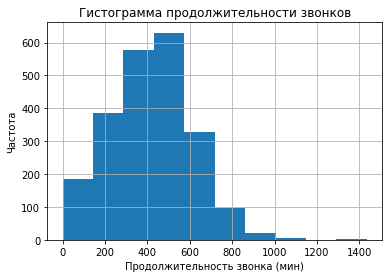

In [27]:
smart_tariff['duration_month'].hist() #гистограмма продолжительности звонков
#добавляем подписи к осям:
plt.xlabel('Продолжительность звонка (мин)')
plt.ylabel('Частота')
#добавляем заголовок графика
plt.title('Гистограмма продолжительности звонков')
plt.show()

Гистограмма получилась с отрицательной скошенностью. Но это не мешает увидеть нам, что чаще всего продолжительность звонка - 500 минут в месяц.

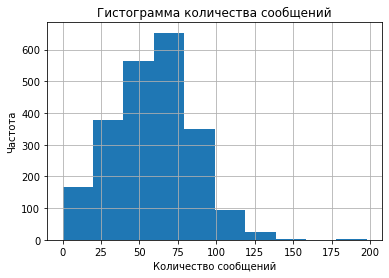

In [28]:
smart_tariff['message_month'].hist() #гистограмма количества сообщений
#добавляем подписи к осям:
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
#добавляем заголовок графика
plt.title('Гистограмма количества сообщений')
plt.show()


В среднем 75 сообщений в месяц.

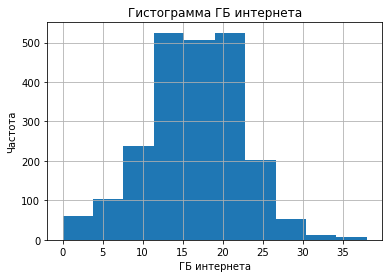

In [29]:
smart_tariff['internet_used'].hist() #гистограмма ГБ интернета
#добавляем подписи к осям:
plt.xlabel('ГБ интернета')
plt.ylabel('Частота')
#добавляем заголовок графика
plt.title('Гистограмма ГБ интернета')
plt.show()

В среднем 17 ГБ в месяц.

Далее проанализируем пользоваталей тарифа Ultra.

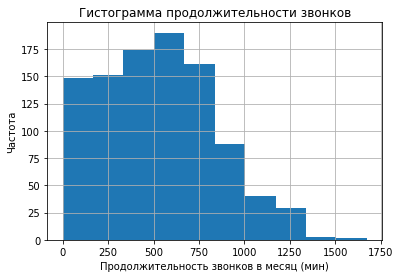

In [30]:
ultra_tariff['duration_month'].hist() #гистограмма продолжительности звонков
#добавляем подписи к осям:
plt.xlabel('Продолжительность звонков в месяц (мин)')
plt.ylabel('Частота')
#добавляем заголовок графика
plt.title('Гистограмма продолжительности звонков')
plt.show()

В среднем 550 минут в месяц.

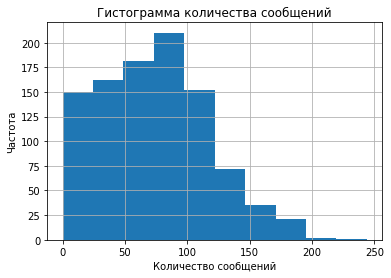

In [31]:
ultra_tariff['message_month'].hist() #гистограмма количества сообщений
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
plt.title('Гистограмма количества сообщений')
plt.show()

В среднем 90 сообщений в месяц.

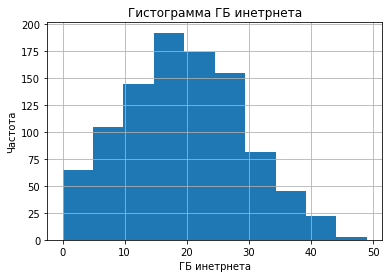

In [32]:
ultra_tariff['internet_used'].hist() #гистограмма ГБ интернета
plt.xlabel('ГБ инетрнета')
plt.ylabel('Частота')
plt.title('Гистограмма ГБ инетрнета')
plt.show()

В среднем 22 ГБ в месяц.

Построим диаграммы размаха для выручки каждого тарифа. Для лучшего анализа посмотрим на среднее значение и медиану с помощью функции `describe`:

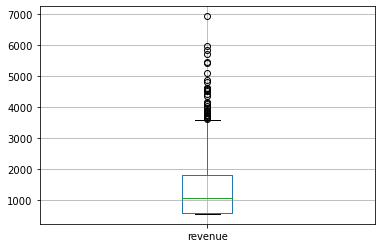

In [33]:
smart_tariff.boxplot(column='revenue')

plt.show()

In [34]:
smart_tariff['revenue'].describe()

count    2230.000000
mean     1318.264126
std       837.716454
min       550.000000
25%       583.000000
50%      1079.000000
75%      1792.000000
max      6920.000000
Name: revenue, dtype: float64

Для тарифа Smart среднее значение равно 1318, медиана - 874. 

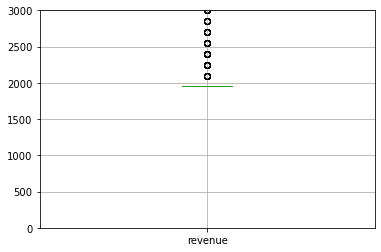

In [35]:
ultra_tariff.boxplot(column='revenue')
plt.ylim(0, 3000)
plt.show()

In [36]:
ultra_tariff['revenue'].describe()

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

И так, среднее значение равно 2070, медиана - 376. Среднее в несколько раз больше медианы. Произошло это потому, что в распределении есть длинный хвост с высокими значениями или несколько очень больший значений (например, макисмальное значение - 4800).

**Выводы**

Пользователи тарифа Ultra совершают более длительные разговоры, отправляют больше сообщений и используют больше ГБ интернета, чем пользователи тарифа Smart. Потребляют больше, но не намного, например, бесплатный месячный лимит покрывает звонки тарифа Smart, а интернет и сообщения чуть превышают этот лимит. 

Так как цена между тарифами различается практически в 4 раза, а пользователи потребляю практически одинаково, можно сказать, что выгоднее подключаться к тарифу Smart.

## 4. Проверка гипотез

**Гипотеза 1.** Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Сформулируем нулевую и альтернативную гипотезу.

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей применим метод `st.ttest_ind`. Критический уровень статистической значимости зададим равный 0.05.

In [37]:
smart_revenue = smart_tariff['revenue']
ultra_revenue = ultra_tariff['revenue']

alpha = .05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    smart_revenue, 
    ultra_revenue)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.948385016542524e-145
Отвергаем нулевую гипотезу


**Вывод** 

Отвергаем нулевую гипотезу. Следовательно, средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.

**Гипотеза 2.** Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевую и альтернативную гипотезу.

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей применим метод `st.ttest_ind`. Критический уровень статистической значимости зададим равный 0.05.

In [38]:
moscow_revenue = data[data['city'] == 'Москва']
moscow_revenue = moscow_revenue['revenue'] #создаем датасет с выручкой по Москве
not_moscow_revenue = data[data['city'] != 'Москва']
not_moscow_revenue = not_moscow_revenue['revenue'] #создаем датасет с выручкой не по Москве

alpha = .05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    moscow_revenue, 
    not_moscow_revenue)

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


**Вывод** 

Не получилось отвергнуть нулевую гипотезу. Следовательно, средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Общий вывод

В этой работе был проведен предварительный анализ тарифов на небольшой выборке клиентов и проанализировано поведение клиентов.

Сформулированы гипотезы: 
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна
2. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

После анализа данных выяснилось, что пользователи тарифа Ultra совершают более длительные разговоры, отправляют больше сообщений и используют больше ГБ интернета, чем пользователи тарифа Smart. Потребляют больше, но не намного, например, бесплатный месячный лимит покрывает звонки тарифа Smart, а интернет и сообщения чуть превышают этот лимит. 

Так как цена между тарифами различается практически в 4 раза, а пользователи потребляю практически одинаково, можно сказать, что выгоднее подключаться к тарифу Smart.